In [9]:
import numpy as np
from matplotlib import pyplot as plt, ticker as mticker
from scipy.sparse import csr_matrix
import matplotlib as mpl
from scipy.integrate import quad
import numba
from scipy.integrate import solve_ivp

sys.path.append('../Numerical_methods')
from matrix_calculator import A_matrix
from scheme_calculator import forward_backward, central
from bachelor_funcs import get_first_dev
from ODE_schemes import A_matrix_regular, stencil_calc

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14}
mpl.rc('font', **font)

In [10]:
N = 1000
r_log = np.logspace(-2, 2, N)

In [11]:
# Inital surface density:
def Σ_initial(r, γ = 1):
    return (3 * np.pi * r**γ)**(-1) * np.exp(-r**(2 - γ))

C = 1 / quad(Σ_initial, r_log[0], r_log[-1])[0]


def Σ_initial_norm(r, γ = 1):
    return C * Σ_initial(r, γ)

In [12]:
N_log = len(r_log)
s = 6

i1 = 0
i2 = s
A_log = np.zeros((N_log, N_log))
for i in range(N_log):
    if abs(i1 - i) >= s/2 and i2 < N:
        i1 += 1
        i2 += 1

    stencil = r_log[i1:i2] - r_log[i]
    coeff = stencil_calc(stencil, 1)
    A_log[i, i1:i2] = coeff
sA_log = csr_matrix(A_log.copy())

In [13]:
def anal_1dev(r, γ = 1):
    return C / (3 * np.pi) * np.exp(-r**(2 - γ)) * (-γ * r**(-γ - 1) + (-2 + γ) * r**(-2*γ + 1))

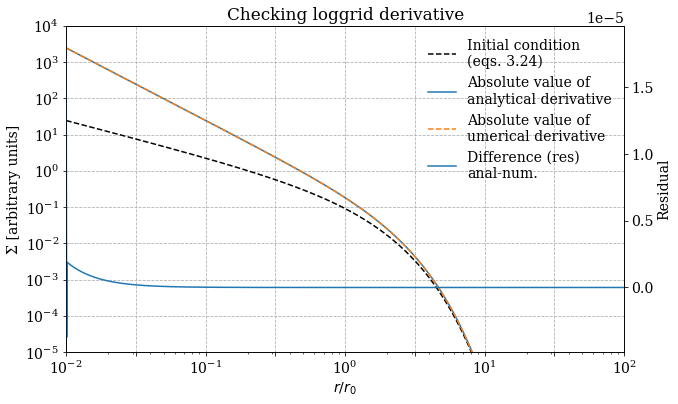

In [14]:
fig, axs = plt.subplots(figsize = (10, 6))
axs.grid(ls='--')

lns1 = axs.loglog(r_log, Σ_initial_norm(r_log), label='Initial condition\n(eqs. 3.24)',  c='black', ls='--', zorder=2)
lns2 = axs.loglog(r_log, abs(anal_1dev(r_log)), label='Absolute value of\nanalytical derivative')
lns3 = axs.loglog(r_log, abs(sA_log @ Σ_initial_norm(r_log)), label='Absolute value of\numerical derivative', ls='--')

axs.set(title='Checking loggrid derivative', xlabel='$r/r_0$', ylabel='Σ [arbitrary units]', 
ylim = (1e-5, 1e4), xlim = (r_log[0], r_log[-1]), yticks = np.logspace(-5, 4, 10), xticks = np.logspace(-2, 2, 9));


res = abs(anal_1dev(r_log)) - abs(sA_log @ Σ_initial_norm(r_log))

axs2 = axs.twinx()

lns4 = axs2.plot(r_log, res, label = 'Difference (res)\nanal-num.')
axs2.set(ylabel='Residual')

lns = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in lns]
axs.legend(lns, labs, frameon = False)


#axs.legend(frameon=False)


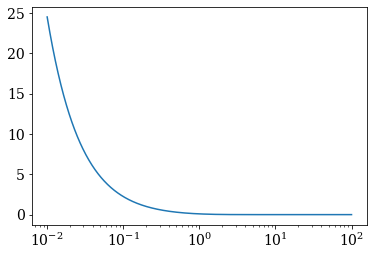

In [15]:
plt.semilogx(r_log, Σ_initial_norm(r_log))
